# ***Problem 1***

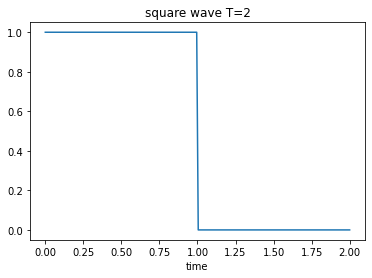

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
def sqr_wav(n):
    t = int(len(n)/2)
    return [1] *t+ [0] * t
n = np.linspace(0,2,200)
sqrwave = sqr_wav(n)
plt.plot(n,sqrwave)
plt.xlabel('time')
plt.title('square wave T=2')
plt.show()


***Framing of  square wave by the coeffecients***

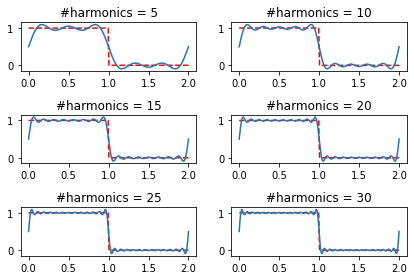

In [11]:
df_coeff = np.fft.fft(sqrwave) * 1/len(sqrwave)  ## Discret Fourier coeffiecients
def gibbs(k):                   ## k is the number of harmonics to be included in the construction
    # q = int((k-1)/2)
    x_n = np.array([0 for i in range(len(sqrwave))])
    for i in range(1,k+1):
        x_n = x_n + 2*(abs(df_coeff[i])) * np.sin(np.pi*i*n)
    x_n = x_n + np.mean(sqrwave)
    return x_n
for i in range(1,7):
  plt.subplot(3,2,i)
  plt.plot(n,sqrwave,'r--')
  plt.plot(n,gibbs(5*i))
  plt.title('#harmonics = %s' %(5*i))
plt.tight_layout()
plt.show()



*   Gibbs Phenomenon dont even die out on increasing the number of harmonics . The oscillatory content remains about 9% even for the best approximation of the square signal from the harmonics.
*   As N  --> inf error in power --> 0. but due to discontinuity in the signal the oscillation still remains 9% inspite of error in power tends to 0. But the phenomenon shifts to the extremes of disconituity as can be seen in the plot



# ***Problem 2***

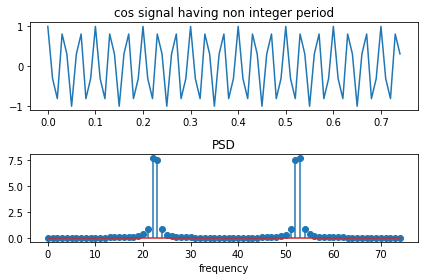

In [20]:
n1 = np.linspace(0,0.99,100)   #### time axis sampled at the rate of 100 samples per second
sgnl = np.cos(2*np.pi*30*n1)  ## cosine signal 
## SPECTRAL LEAKAGE
sgnl = sgnl[:75]   ## let say I cut the signal by 25 samples to make the signal having non integer period
plt.subplot(211)
plt.plot(n1[:75],sgnl)
plt.title('cos signal having non integer period')
def power(y):   ## define a power signal
    x = np.fft.fft(y)
    return abs(x)**2/len(x)
f = np.arange(100)
plt.subplot(212)
plt.stem(f[:75],power(sgnl),use_line_collection='True')
plt.title('PSD')
plt.xlabel('frequency')
plt.tight_layout()
plt.show()


***Cosine signal looks like the above because of lesser number of samples in one time period***

*It can be well observed that the PSD is not concentrtated on the frequency = 30Hz but distributed among the neighours. This is called Spectral Leakage*

***We can minimize it by use of window functions. The implementation is a s follows***

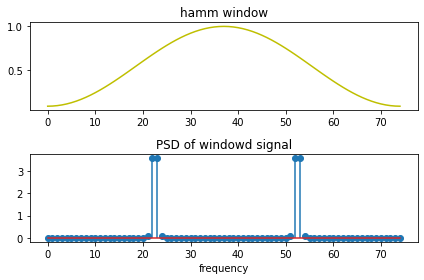

In [30]:
#### Hamming Window Implementation
hamm = np.hamming(75)   ## generates 75 points 
plt.subplot(211)
plt.plot(hamm,'y')
plt.title('hamm window')
windwd_sgnl = sgnl[:75] * hamm
plt.subplot(212)
plt.stem(f[:75],power(windwd_sgnl),use_line_collection='True')
plt.title('PSD of windowd signal')
plt.xlabel('frequency')
plt.tight_layout()
plt.show()

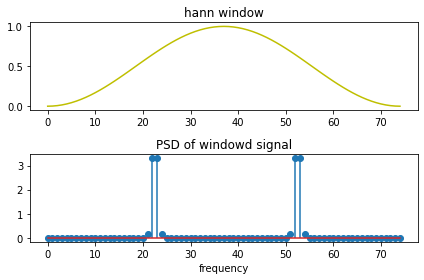

In [32]:
#### Hann Window Implemetation
hann = np.hanning(75)   ## generates 75 points 
plt.subplot(211)
plt.plot(hann,'y')
plt.title('hann window')
windwd_sgnl = sgnl[:75] * hann
plt.subplot(212)
plt.stem(f[:75],power(windwd_sgnl),use_line_collection='True')
plt.title('PSD of windowd signal')
plt.xlabel('frequency')
plt.tight_layout()
plt.show()

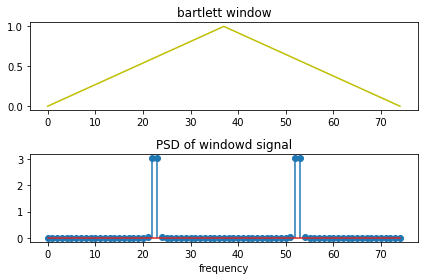

In [33]:
#### Bartlett Window Implemetation
bartlett = np.bartlett(75)   ## generates 75 points 
plt.subplot(211)
plt.plot(bartlett,'y')
plt.title('bartlett window')
windwd_sgnl = sgnl[:75] * bartlett
plt.subplot(212)
plt.stem(f[:75],power(windwd_sgnl),use_line_collection='True')
plt.title('PSD of windowd signal')
plt.xlabel('frequency')
plt.tight_layout()
plt.show()

***All these windows minimise the extra components. However they dont do the perfect job which is the concentration of the power at the signal frequency but the performance is better.***

# ***Problem 3***

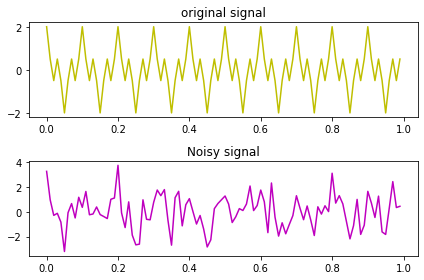

In [44]:
### Noise filtering

sgnl1 =  np.cos(2*np.pi*30*n1) + np.cos(2*np.pi*10*n1)   ### Original signal containing 30 Hz and 10 Hz components
sgnl2 = np.cos(2*np.pi*30*n1) + np.cos(2*np.pi*10*n1) + np.random.normal(0,1,100)
plt.subplot(211)
plt.plot(n1,sgnl1,'y')
plt.title('original signal')
plt.subplot(212)
plt.plot(n1,sgnl2,'m')
plt.title('Noisy signal')
plt.tight_layout()
plt.show()

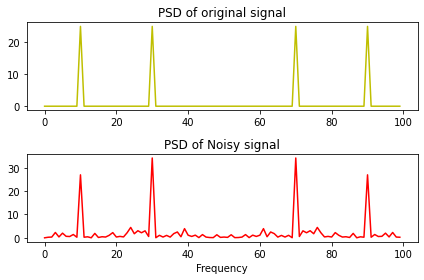

In [36]:
## PSD of the signals
plt.subplot(211)
plt.plot(power(sgnl1),'y')
plt.title('PSD of original signal')
plt.subplot(212)
plt.plot(power(sgnl2),'r')
plt.title('PSD of Noisy signal')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

***Filtering***

*From the graph It is well observed that the required impulses are more than 10 hence let my threshold be 10 for the proper filtering*

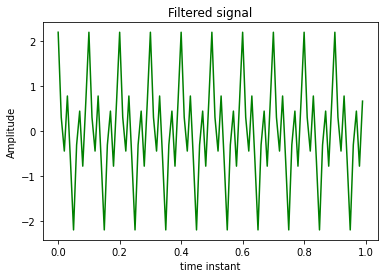

In [43]:
x = np.fft.fft(sgnl2)
power_sgnl = power(sgnl2)
for i in range(len(x)):   ## Zeroing the indices that are lesser than amplitude of 10
    if power_sgnl[i]<10:
        x[i] = 0
filtrd = np.real(np.fft.ifft(x))  ## taking inverse transform of the filtered PSD 'x'
plt.plot(n1,filtrd,'g')
plt.title('Filtered signal')
plt.ylabel('Amplitude')
plt.xlabel('time instant')
plt.show()